# Hands-on: EDA

This hands-on will cover some techniques for exploratory data analysis using the Citibike Trip Histories dataset. The first few sections include code to prepare the data.

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

# matplotlib -> used for visualization
# seaborn -> a prettier version of how you can visualize data with python
# scipy.stats -> way to calculate statistics

Populating the interactive namespace from numpy and matplotlib


## Data - CitiBike Trip Histories

CitiBike provides the data of the bike share through this website: https://www.citibikenyc.com/system-data

For this exercise, we'll be using their trip history data which may be found [here](https://s3.amazonaws.com/tripdata/index.html). 

Kindly choose a 2021 month file to download (not the ones with JC as the prefix). You can download data for January or Febuary (20-50MB in file size for slow internet connections) and extract it to your data folder.

In [2]:
data = pd.read_csv('data/202102-citibike-tripdata.csv')
data.head()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member


In [3]:
data.rideable_type.unique()

array(['docked_bike'], dtype=object)

## Feature Extraction

Let's get the day of the week, hour of the day and the year from the start time

In [4]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

## add the code here
data['dayoftheweek'] = data['started_at'].dt.dayofweek
data['houroftheday'] = data['started_at'].dt.hour
data['year'] = data['started_at'].dt.year

In [5]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021


## Feature Transformation

Create a duration but in minutes

In [6]:
data['timedelta'] = data['ended_at'] - data['started_at']
data.head()

# timedelta would be equal to the difference between the two dates (days, hours,
# minutes, seconds)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58


In [7]:
data['duration_min'] = data['timedelta'] / pd.to_timedelta(1, unit='m')
data.head()

# this would make it into minutes instead
# -> In the previous notebook, there was already the duration column that was
# already computed for us. But here, we have to get it using the difference
# of the start time and the end time, which would have days, hours, minutes, 
# and seconds, which is why we cannot just divide it by 60. This is why
# we really have to use the to_timedelta function.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667


## Feature Generation

Compute for the age of the rider based on the birth year

In [8]:
# data['age'] = ## complete the code here
# data.head()

# We don't have this information anymore.

#### Distance

Another feature we can generate from the data is distance. Although the provided values are in longitude and latitudes and they're measured in degrees, the distance calculated from these points would also be in degrees (and not meters). 

There's actually a library that specifically handles geospatial data called `geopy` ([Link](https://geopy.readthedocs.io/en/stable/#module-geopy.distance)). For simplicity sake in this tutorial, we use an existing function that calculates the geodesic distance using the Haversine formula given the starting and ending longitude and latitudes: `calculate_distance(lat1, lon1, lat2, lon2)`

Credits to [Wayne Dyck](https://gist.github.com/rochacbruno/2883505) for the function.

In [9]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    Calculates the distance provided a pair of longitudes and latitudes
    using the Haversine formula
    
    Returns the distance in kilometers.
    """
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [10]:
data['distance_km'] = data.apply(lambda x: calculate_distance(x['start_lat'], x['start_lng'],
                                        x['end_lat'], x['end_lng']), axis=1)

In [11]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273


----
----

# Exploratory Data Analysis

We will do the following:
1. Examine the size and structure of the data
2. Examine each field individually
3. Examine relationships/correlations
4. Identify anomalies/outliers

## 1. Size and structure of the data

In [12]:
data.shape

(649983, 19)

In [13]:
len(data)

# -> enough if you don't wanna know the number of columns

649983

After feature transformations, the dataset now has 649,983 observations with 19 variables.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649983 entries, 0 to 649982
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             649983 non-null  object         
 1   rideable_type       649983 non-null  object         
 2   started_at          649983 non-null  datetime64[ns] 
 3   ended_at            649983 non-null  datetime64[ns] 
 4   start_station_name  649983 non-null  object         
 5   start_station_id    649983 non-null  object         
 6   end_station_name    648651 non-null  object         
 7   end_station_id      648651 non-null  object         
 8   start_lat           649983 non-null  float64        
 9   start_lng           649983 non-null  float64        
 10  end_lat             648651 non-null  float64        
 11  end_lng             648651 non-null  float64        
 12  member_casual       649983 non-null  object         
 13  dayoftheweek  

The dataset has a variety of datatypes: integer and float values, date and time, and strings. There are no variables with null/missing values.

In [15]:
# Get descriptive statistics of quantitative variables
data.describe()

,start_lat,start_lng,end_lat,end_lng,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
count,649983.000000,649983.000000,648651.000000,648651.000000,649983.000000,649983.000000,649983.0,649983,649983.000000,648651.000000
mean,40.742008,-73.976612,40.741736,-73.976785,3.145970,14.011331,2021.0,0 days 00:16:42.812924338,16.713549,1.800458
std,0.034752,0.022758,0.034646,0.022861,1.866804,4.588723,0.0,0 days 05:40:50.476406806,340.841273,1.568409
min,40.644512,-74.023087,40.644512,-74.043991,0.000000,0.000000,2021.0,-7 days +01:11:06,-10008.900000,0.000000
25%,40.718939,-73.992573,40.718939,-73.993012,2.000000,11.000000,2021.0,0 days 00:05:31,5.516667,0.749298
50%,40.741739,-73.981632,40.741459,-73.981693,3.000000,15.000000,2021.0,0 days 00:09:40,9.666667,1.368215
75%,40.764718,-73.961589,40.764175,-73.961199,5.000000,17.000000,2021.0,0 days 00:17:04,17.066667,2.375998
max,40.852252,-73.884308,40.852252,-73.884308,6.000000,23.000000,2021.0,114 days 15:14:33,165074.550000,17.937935


Although these variables are all quantitative, it doesn't really make sense to look at the statistics for unique IDs and spatial data like `start station id`, `start station latitude`, `start station longitude`, and `bikeid`, among others. Here, we will just focus on the values for `birth year`, `duration_min`, `age`, and `distance_km`.

Few insights from the `data.describe()` function:

1. (NOT INCLUDED ANYMORE BECAUSE THE `birth year` COLUMN IS GONE) The minimum `birth year` is 1885 which has a remarkably large difference from the 25th percentile value. Can this be anomalous data?
2. There is a very large difference between the maximum and 75th percentile values of `duration_min` and `age` (`age` IS NOT INCLUDED ANYMORE).
3. Observations #1 & #2 indicate possible outliers in the data. 

In [16]:
data.describe(include=np.object)


# -> It's weird that the unique values for the start_station_name and 
# start_station_id do not have the same number.

<ipython-input-16-583e6ccbc344>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=np.object)


,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,649983,649983,649983,649983.00,648651,648651.00,649983
unique,649983,1,1280,2440.00,1290,1651.00,2
top,9869D00F487CC68B,docked_bike,1 Ave & E 68 St,6822.09,1 Ave & E 68 St,6822.09,member
freq,1,649983,4384,3490.00,4346,3827.00,557445


These are the descriptive stats for the categorical variables. 

## 2. Examining individual variables

Now, we can start generating simple visualizations to help us better understand the values in each variable.

### User type

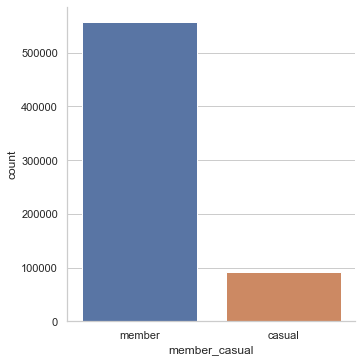

In [17]:
sns.set_theme(style="whitegrid")

usertype_plot = sns.catplot(x="member_casual", kind="count", order=["member", "casual"], data=data)

# -> Before, there are more one-time users of citybike (casual), now, there's more members.

In [18]:
data.member_casual.value_counts()

member    557445
casual     92538
Name: member_casual, dtype: int64

### Age

(NOT APPLICABLE ANYMORE)

In [ ]:
age_plot = sns.catplot(x="age", kind="count", data=data)
age_plot.set(ylim=(0,7500)) # Limit the maximum y-axis value because of one outlier count for age 52
age_plot.fig.set_size_inches(25, 6.5)

In [ ]:
data["age"].value_counts()

### Starting Stations

In [27]:
start_stations = data['start_station_name'].value_counts().rename_axis('Station name').reset_index(name = 'counts')
start_stations = start_stations.nlargest(10, 'counts')
start_stations

# -> rename_axis () means that we would be putting a name on the column.
# -> reset_index () would make it into a dataframe, and name='counts' would rename the column
# -> nlargest would just show the 10 stations with the highest number of counts

,Station name,counts
0,1 Ave & E 68 St,4384
1,W 21 St & 6 Ave,3822
2,W 33 St & 7 Ave,3308
3,E 17 St & Broadway,3285
4,E 13 St & Avenue A,3100
5,E 33 St & 1 Ave,3031
6,Broadway & W 60 St,2824
7,Grand St & Elizabeth St,2749
8,Clinton St & Grand St,2676
9,Pershing Square North,2667


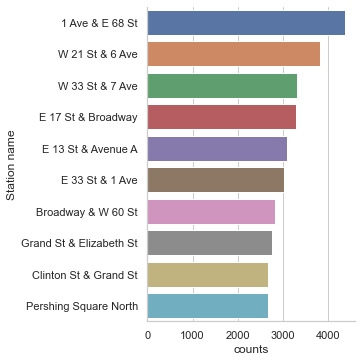

In [28]:
start_station_plot = sns.catplot(y="Station name", x="counts", orient="h", kind="bar", data=start_stations)

In [29]:
diff_start_end = data[data['start_station_name'] != data['end_station_name']]
diff_start_end.head()

# -> We investigated this after seeing that the number of the starting and ending stations are
# almost similar in terms of number of people starting/ending there. Maybe they live near that 
# station so they use it when they leave the house and return it in that station when they 
# return.
# -> Another part of EDA is trying to interpret/understand what you see or noticed from your data.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273


In [30]:
start_stations = diff_start_end["start_station_name"].value_counts().rename_axis('Station name').reset_index(name='counts')
start_stations = start_stations.nlargest(10, 'counts')
start_stations

,Station name,counts
0,1 Ave & E 68 St,4173
1,W 21 St & 6 Ave,3697
2,W 33 St & 7 Ave,3190
3,E 17 St & Broadway,3158
4,E 13 St & Avenue A,2944
5,E 33 St & 1 Ave,2913
6,Broadway & W 60 St,2679
7,Grand St & Elizabeth St,2634
8,Pershing Square North,2598
9,E 27 St & 1 Ave,2548


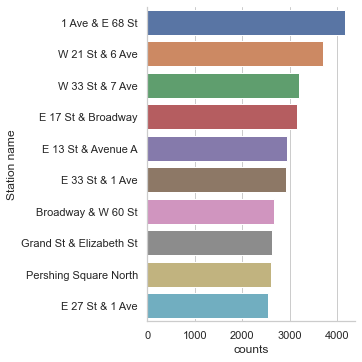

In [31]:
start_station_plot = sns.catplot(y="Station name", x="counts", orient="h", kind="bar", data=start_stations)

In [46]:
same_start_end = data [data['start_station_name'] == data['end_station_name']]
same_start_end.head ()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
52,9F5158BD1C81528F,docked_bike,2021-02-16 13:39:28,2021-02-16 13:39:54,E 88 St & Park Ave,7293.1,E 88 St & Park Ave,7293.10,40.781410,-73.955959,40.781411,-73.955959,member,1,13,2021,0 days 00:00:26,0.433333,0.000078
53,FB27C8CD0D398DFE,docked_bike,2021-02-28 09:38:55,2021-02-28 09:40:00,5 Ave & 3 St,3987.06,5 Ave & 3 St,3987.06,40.672815,-73.983523,40.672815,-73.983524,member,6,9,2021,0 days 00:01:05,1.083333,0.000072
54,D5C62E8072344830,docked_bike,2021-02-25 19:48:40,2021-02-25 19:48:46,11 Ave & W 27 St,6425.04,11 Ave & W 27 St,6425.04,40.751396,-74.005226,40.751396,-74.005226,member,3,19,2021,0 days 00:00:06,0.100000,0.000000
56,51C2576C990809D0,docked_bike,2021-02-24 16:16:49,2021-02-24 16:16:52,Lewis Ave & Kosciuszko St,4617.01,Lewis Ave & Kosciuszko St,4617.01,40.692371,-73.937054,40.692371,-73.937054,member,2,16,2021,0 days 00:00:03,0.050000,0.000000
358,A2C933A530CD536F,docked_bike,2021-02-16 08:32:30,2021-02-16 08:33:02,W 44 St & 11 Ave,6756.05,W 44 St & 11 Ave,6756.05,40.762009,-73.996975,40.762009,-73.996975,member,1,8,2021,0 days 00:00:32,0.533333,0.000000


In [47]:
same_start_end.describe()

# -> These are some that you cannot include as a regular trip, and its even a 
# member that is moving these bikes. And if you take a look at the time 
# duration, it goes from negative, and the longest that they have is 22 
# minutes and the distance in km is not that far. 
# -> So, these counts may actually be excluded from the actual trips of 
# origin-destination pairs as it is weird that they have not traveled, 
# so that you can actually get the correct start to end location of 
# most of the trips of people.

,start_lat,start_lng,end_lat,end_lng,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
count,34593.000000,34593.000000,34593.000000,34593.000000,34593.000000,34593.000000,34593.0,34593,34593.000000,34593.000000
mean,40.743821,-73.974079,40.743821,-73.974080,3.238025,14.352499,2021.0,0 days 00:19:20.485907553,19.341432,0.000040
std,0.038261,0.024337,0.038261,0.024337,1.884056,4.539265,0.0,0 days 04:01:01.718971086,241.028650,0.000042
min,40.644512,-74.023087,40.644512,-74.023087,0.000000,0.000000,2021.0,-1 days +23:58:46,-1.233333,0.000000
25%,40.716887,-73.991255,40.716887,-73.991255,2.000000,12.000000,2021.0,0 days 00:00:37,0.616667,0.000000
50%,40.742909,-73.979452,40.742909,-73.979453,3.000000,15.000000,2021.0,0 days 00:04:16,4.266667,0.000031
75%,40.769248,-73.958184,40.769248,-73.958185,5.000000,18.000000,2021.0,0 days 00:22:05,22.083333,0.000078
max,40.852252,-73.884308,40.852252,-73.884308,6.000000,23.000000,2021.0,18 days 18:08:35,27008.583333,0.000140


### Ending stations

In [32]:
end_stations = diff_start_end["end_station_name"].value_counts().rename_axis('Station name').reset_index(name='counts')
end_stations = end_stations.nlargest(10, 'counts')
end_stations

,Station name,counts
0,1 Ave & E 68 St,4135
1,W 21 St & 6 Ave,3663
2,E 17 St & Broadway,3397
3,W 33 St & 7 Ave,3136
4,E 33 St & 1 Ave,2940
5,E 13 St & Avenue A,2937
6,Broadway & W 60 St,2700
7,Grand St & Elizabeth St,2652
8,Pershing Square North,2601
9,E 27 St & 1 Ave,2565


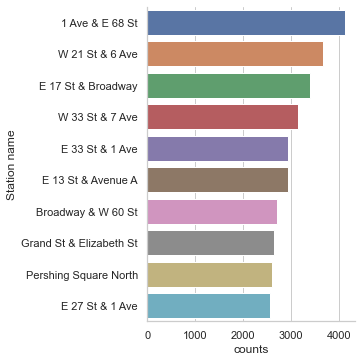

In [33]:
end_station_plot = sns.catplot(y="Station name", x="counts", orient="h", kind="bar", data=end_stations)

We can see from both plots that the top 10 start and end stations are consistent with each other. This indicates high taffic areas which can be potential locations for adding more bikes and bike docks. 

### Origin-Destination Pairs

Here we create `od_trips` which contains the origin-destination pairs derived from the unique pairs of `start station name` and `end station name`.

In [41]:
od_trips = data.groupby (['start_station_name', 'end_station_name'], as_index = False)['ride_id'].count()
od_trips = od_trips.rename(columns = {'start_station_name': 'start', 'end_station_name':'end', 'ride_id':'total_trips'}, errors='raise')
od_trips

,start,end,total_trips
0,1 Ave & E 110 St,1 Ave & E 110 St,36
1,1 Ave & E 110 St,1 Ave & E 68 St,11
2,1 Ave & E 110 St,1 Ave & E 78 St,1
3,1 Ave & E 110 St,1 Ave & E 94 St,2
4,1 Ave & E 110 St,2 Ave & 29 St,2
...,...,...,...
164735,Wythe Ave & Metropolitan Ave,Willoughby Ave & Tompkins Ave,2
164736,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,1
164737,Wythe Ave & Metropolitan Ave,Willoughby St & Fleet St,1
164738,Wythe Ave & Metropolitan Ave,Wyckoff Av & Stanhope St,1


In [42]:
od_trips['od'] = od_trips ['start'] + od_trips ['end']
od_trips


,start,end,total_trips,od
0,1 Ave & E 110 St,1 Ave & E 110 St,36,1 Ave & E 110 St1 Ave & E 110 St
1,1 Ave & E 110 St,1 Ave & E 68 St,11,1 Ave & E 110 St1 Ave & E 68 St
2,1 Ave & E 110 St,1 Ave & E 78 St,1,1 Ave & E 110 St1 Ave & E 78 St
3,1 Ave & E 110 St,1 Ave & E 94 St,2,1 Ave & E 110 St1 Ave & E 94 St
4,1 Ave & E 110 St,2 Ave & 29 St,2,1 Ave & E 110 St2 Ave & 29 St
...,...,...,...,...
164735,Wythe Ave & Metropolitan Ave,Willoughby Ave & Tompkins Ave,2,Wythe Ave & Metropolitan AveWilloughby Ave & T...
164736,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,1,Wythe Ave & Metropolitan AveWilloughby Ave & W...
164737,Wythe Ave & Metropolitan Ave,Willoughby St & Fleet St,1,Wythe Ave & Metropolitan AveWilloughby St & Fl...
164738,Wythe Ave & Metropolitan Ave,Wyckoff Av & Stanhope St,1,Wythe Ave & Metropolitan AveWyckoff Av & Stanh...


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


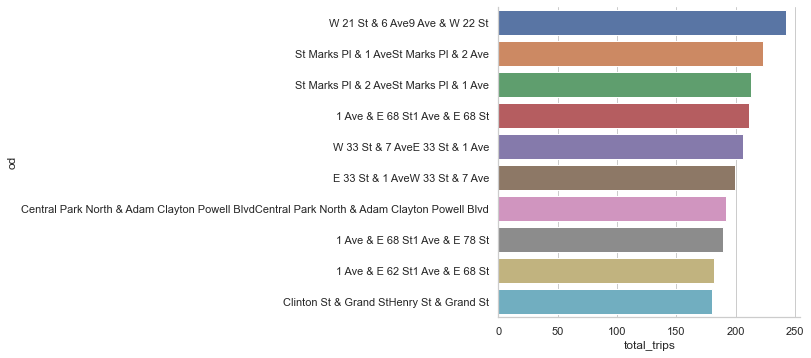

In [43]:
od_rank_plot = sns.catplot(y="od", x="total_trips", orient="h", kind="bar", data=od_trips.nlargest(10, "total_trips"))

# -> Questions: Why would you move a bike from a station to the same station?

In [45]:
od_trips[od_trips['start'] == od_trips['end']]

# -> Filtering od_trips to only show those trips with the same starting
# and end station. This is one way or we can check it in the original 
# DataFrame.

,start,end,total_trips,od
0,1 Ave & E 110 St,1 Ave & E 110 St,36,1 Ave & E 110 St1 Ave & E 110 St
156,1 Ave & E 16 St,1 Ave & E 16 St,65,1 Ave & E 16 St1 Ave & E 16 St
469,1 Ave & E 18 St,1 Ave & E 18 St,98,1 Ave & E 18 St1 Ave & E 18 St
765,1 Ave & E 30 St,1 Ave & E 30 St,45,1 Ave & E 30 St1 Ave & E 30 St
1082,1 Ave & E 39 St,1 Ave & E 39 St,114,1 Ave & E 39 St1 Ave & E 39 St
...,...,...,...,...
164201,Woodward Ave & Harman St,Woodward Ave & Harman St,3,Woodward Ave & Harman StWoodward Ave & Harman St
164280,Wyckoff Av & Jefferson St,Wyckoff Av & Jefferson St,5,Wyckoff Av & Jefferson StWyckoff Av & Jefferso...
164373,Wyckoff Av & Stanhope St,Wyckoff Av & Stanhope St,6,Wyckoff Av & Stanhope StWyckoff Av & Stanhope St
164479,Wyckoff St & Nevins St,Wyckoff St & Nevins St,20,Wyckoff St & Nevins StWyckoff St & Nevins St


In [71]:
diff_start_end.shape

(615390, 19)

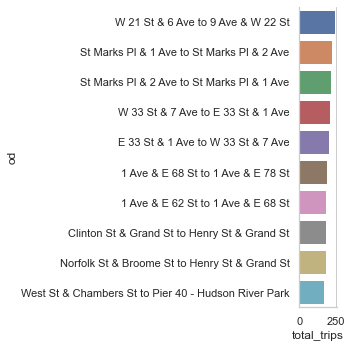

In [74]:
od_rank_plot = sns.catplot(y="od", x="total_trips", orient="h", kind="bar", data=od_trips.nlargest(10, "total_trips"))

### Origin-Destination Matrix

In this part, we focus on analyzing the number of trips between the top 10 `start` and `end` stations. It would be impossible to visually analyze for all possible pairs because the dataset is too big.

In [48]:
# Get the trips between the top 10 stations.

od_topten = od_trips[od_trips.start.isin(start_stations["Station name"]) & od_trips.end.isin(end_stations["Station name"])]
od_topten

,start,end,total_trips,od
2324,1 Ave & E 68 St,1 Ave & E 68 St,211,1 Ave & E 68 St1 Ave & E 68 St
2440,1 Ave & E 68 St,Broadway & W 60 St,37,1 Ave & E 68 StBroadway & W 60 St
2489,1 Ave & E 68 St,E 13 St & Avenue A,8,1 Ave & E 68 StE 13 St & Avenue A
2496,1 Ave & E 68 St,E 17 St & Broadway,9,1 Ave & E 68 StE 17 St & Broadway
2505,1 Ave & E 68 St,E 27 St & 1 Ave,11,1 Ave & E 68 StE 27 St & 1 Ave
...,...,...,...,...
145859,W 33 St & 7 Ave,E 33 St & 1 Ave,206,W 33 St & 7 AveE 33 St & 1 Ave
145927,W 33 St & 7 Ave,Grand St & Elizabeth St,4,W 33 St & 7 AveGrand St & Elizabeth St
145975,W 33 St & 7 Ave,Pershing Square North,93,W 33 St & 7 AvePershing Square North
146014,W 33 St & 7 Ave,W 21 St & 6 Ave,21,W 33 St & 7 AveW 21 St & 6 Ave


In [49]:
# Create a matrix

od_matrix = pd.pivot_table(od_topten, index='start', columns='end', values='total_trips', aggfunc=np.sum, fill_value=0)
od_matrix

# -> The start will be the index so it means that it will become a row, and the
# end is the column so it will become a row.

end,1 Ave & E 68 St,Broadway & W 60 St,E 13 St & Avenue A,E 17 St & Broadway,E 27 St & 1 Ave,E 33 St & 1 Ave,Grand St & Elizabeth St,Pershing Square North,W 21 St & 6 Ave,W 33 St & 7 Ave
start,,,,,,,,,,
1 Ave & E 68 St,211,37,8,9,11,11,13,13,1,62
Broadway & W 60 St,35,145,0,6,1,1,1,9,2,6
E 13 St & Avenue A,10,0,156,35,23,5,11,3,30,5
E 17 St & Broadway,4,3,46,127,24,22,8,20,78,13
E 27 St & 1 Ave,21,2,22,31,109,65,5,35,6,113
E 33 St & 1 Ave,40,1,23,32,45,118,8,84,32,199
Grand St & Elizabeth St,1,0,15,15,11,8,115,0,16,0
Pershing Square North,31,9,8,20,13,108,0,69,11,84
W 21 St & 6 Ave,2,4,19,25,7,12,8,10,125,18


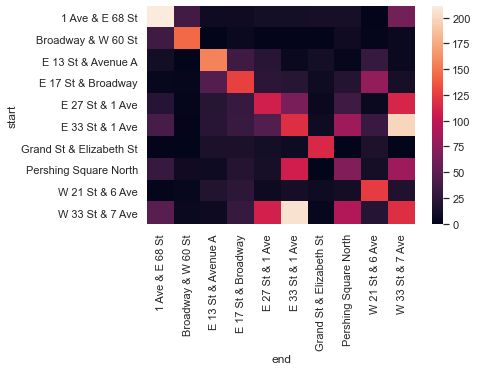

In [50]:
# Generate a heatmap

od_heatmap = sns.heatmap(od_matrix)
# -> Ideally, we're gonna get a 0 count for the diagonal, but as we can see
# those in the diagonal have a lot of trips.
# -> It's weird that the origin and destination are the same.
# -> So, in this, we can see that there are things that we have to investigate.

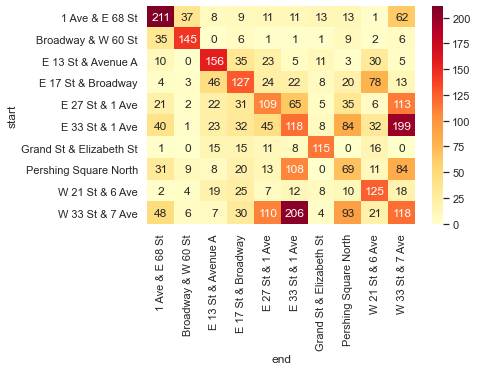

In [51]:
# Change color palette

od_heatmap = sns.heatmap(od_matrix, cmap="YlOrRd", annot=True, fmt="d")

# -> fmt formats the type of number that would be printed out. If we use
# .2f as fmt, it would print 2 decimal places also.
# -> Removing those with the same start and end is a pre-processing step.
# So, it should be done at the first part of the Origin-Destination Pair
# -> But, it can actually be done even earlier (i.e., Starting Stations heading),
# so that we would only need to play with the data that are really mostly used,
# as it might change the counts of the other things that we checked.

#### Version 2: with no same start and end

In [52]:
# -> Pre-processing to remove the same start and end destination
diff_start_end = data[data['start_station_name'] != data['end_station_name']]
diff_start_end.head()

# -> Then, we can use this diff_start_end to create the origin-destination 
# pairs (to create od_trips)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273


In [53]:
od_trips = diff_start_end.groupby (['start_station_name', 'end_station_name'], as_index = False)['ride_id'].count()
od_trips = od_trips.rename(columns = {'start_station_name': 'start', 'end_station_name':'end', 'ride_id':'total_trips'}, errors='raise')
od_trips

,start,end,total_trips
0,1 Ave & E 110 St,1 Ave & E 68 St,11
1,1 Ave & E 110 St,1 Ave & E 78 St,1
2,1 Ave & E 110 St,1 Ave & E 94 St,2
3,1 Ave & E 110 St,2 Ave & 29 St,2
4,1 Ave & E 110 St,2 Ave & E 104 St,2
...,...,...,...
163509,Wythe Ave & Metropolitan Ave,William St & Pine St,2
163510,Wythe Ave & Metropolitan Ave,Willoughby Ave & Tompkins Ave,2
163511,Wythe Ave & Metropolitan Ave,Willoughby Ave & Walworth St,1
163512,Wythe Ave & Metropolitan Ave,Willoughby St & Fleet St,1


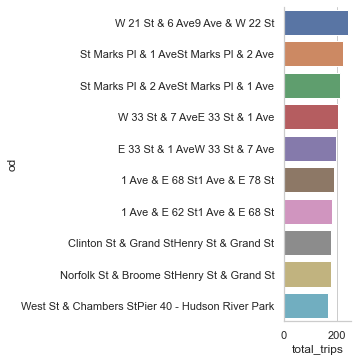

In [55]:
od_trips['od'] = od_trips ['start'] + od_trips ['end']
od_trips
od_rank_plot = sns.catplot(y="od", x="total_trips", orient="h", kind="bar", data=od_trips.nlargest(10, "total_trips"))

# -> We can see that it is smaller.

In [56]:
od_topten = od_trips[od_trips.start.isin(start_stations["Station name"]) & od_trips.end.isin(end_stations["Station name"])]
od_matrix = pd.pivot_table(od_topten, index='start', columns='end', values='total_trips', aggfunc=np.sum, fill_value=0)
od_matrix

# -> So, we can see that the values of the diagonal are 0s.

end,1 Ave & E 68 St,Broadway & W 60 St,E 13 St & Avenue A,E 17 St & Broadway,E 27 St & 1 Ave,E 33 St & 1 Ave,Grand St & Elizabeth St,Pershing Square North,W 21 St & 6 Ave,W 33 St & 7 Ave
start,,,,,,,,,,
1 Ave & E 68 St,0,37,8,9,11,11,13,13,1,62
Broadway & W 60 St,35,0,0,6,1,1,1,9,2,6
E 13 St & Avenue A,10,0,0,35,23,5,11,3,30,5
E 17 St & Broadway,4,3,46,0,24,22,8,20,78,13
E 27 St & 1 Ave,21,2,22,31,0,65,5,35,6,113
E 33 St & 1 Ave,40,1,23,32,45,0,8,84,32,199
Grand St & Elizabeth St,1,0,15,15,11,8,0,0,16,0
Pershing Square North,31,9,8,20,13,108,0,0,11,84
W 21 St & 6 Ave,2,4,19,25,7,12,8,10,0,18


### Day of week

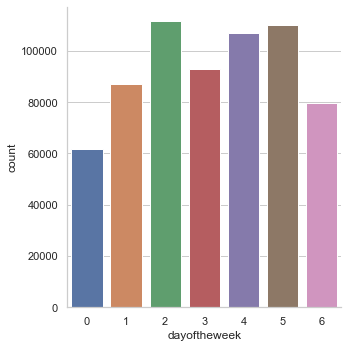

In [80]:
dow_plot = sns.catplot(x="dayoftheweek", kind="count", data=data)

The values for `dayofweek` starts with `0` or `Monday` and ends with `6` or `Sunday`. Based on the bar plot above, most trips happen on Wednesdays, Fridays and Saturdays.

### Hour of day

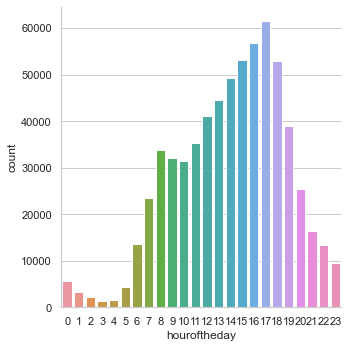

In [81]:
hod_plot = sns.catplot(x="houroftheday", kind="count", data=data)

From the plot, the number of trips starts increasing from 12 noon and peaks at 5PM. 

### Duration in minutes

In [82]:
data["duration_min"].describe()

count    649983.000000
mean         16.713549
std         340.841273
min      -10008.900000
25%           5.516667
50%           9.666667
75%          17.066667
max      165074.550000
Name: duration_min, dtype: float64

### Detect and remove outliers

Outliers are defined as values that is more than 3 standard deviations away from the mean. Here, we detect them by computing the z score of each value, which is relative to the mean and standard deviation.

<AxesSubplot:>

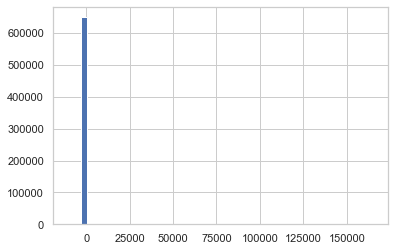

In [87]:
data["duration_min"].hist(bins=50)

In [92]:
z_scores = zscore(data["duration_min"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_entries = (abs_z_scores < 3) 

# Array of boolean values where value is True if it is an outlier, otherwise False.
duration_min_outliers = (abs_z_scores >= 3)
data[duration_min_outliers].duration_min # Show outlier values

89        1499.666667
471       1716.183333
732       1862.866667
880       6945.016667
2885      1499.900000
             ...     
642294    1129.383333
643286    1193.716667
645546    1200.966667
647657    8198.616667
647671    1055.800000
Name: duration_min, Length: 515, dtype: float64

#### Histograms with KDE

(0.0, 100.0)

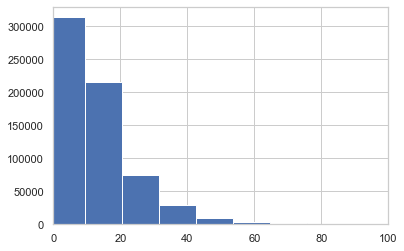

In [104]:
ax = data[filtered_entries].duration_min.hist(bins=100)
ax.set_xlim([0, 100])

In [98]:
data[filtered_entries].duration_min.describe()

count    649468.000000
mean         13.788994
std          21.921550
min         -68.116667
25%           5.516667
50%           9.666667
75%          17.033333
max        1038.266667
Name: duration_min, dtype: float64

In [105]:
removed_outliers = data[filtered_entries]
removed_outliers.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273


In [106]:
removed_outliers.shape

(649468, 19)

In [108]:
valid_trips = removed_outliers[(removed_outliers.duration_min > 0) & (removed_outliers.distance_km > 0)]
valid_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273


In [109]:
valid_trips.shape

(631818, 19)

In [125]:
valid_trips.describe()

,start_lat,start_lng,end_lat,end_lng,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
count,631818.000000,631818.000000,631818.000000,631818.000000,631818.000000,631818.000000,631818.0,631818,631818.000000,631818.000000
mean,40.741863,-73.976797,40.741592,-73.976973,3.145540,14.002664,2021.0,0 days 00:13:29.300130733,13.488336,1.845251
std,0.034553,0.022596,0.034440,0.022700,1.867402,4.590661,0.0,0 days 00:18:37.027082933,18.617118,1.559954
min,40.644512,-74.023087,40.644512,-74.043991,0.000000,0.000000,2021.0,0 days 00:00:01,0.016667,0.000003
25%,40.718939,-73.992662,40.718939,-73.993012,2.000000,11.000000,2021.0,0 days 00:05:36,5.600000,0.792772
50%,40.741739,-73.981655,40.741444,-73.981693,3.000000,15.000000,2021.0,0 days 00:09:41,9.683333,1.399761
75%,40.764397,-73.961814,40.763909,-73.961651,5.000000,17.000000,2021.0,0 days 00:16:55,16.916667,2.414159
max,40.852252,-73.884308,40.852252,-73.884308,6.000000,23.000000,2021.0,0 days 17:18:16,1038.266667,17.937935


(0.0, 200.0)

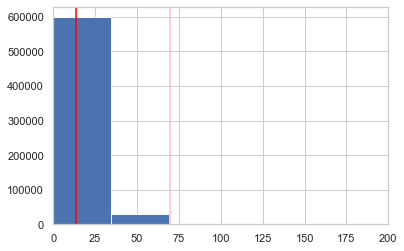

In [132]:
ax = valid_trips.duration_min.hist(bins=30)
ax.axvline(valid_trips.duration_min.mean(), color='red')
ax.axvline(valid_trips.duration_min.mean() + (3 * valid_trips.duration_min.std()), color='pink')
ax.set_xlim([0, 200])

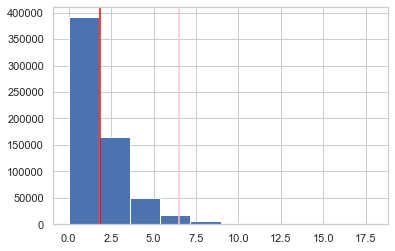

In [143]:
ax = valid_trips.distance_km.hist(bins=10)
ax.axvline(valid_trips.distance_km.mean(), color='red')
ax.axvline(valid_trips.distance_km.mean() + (3 * valid_trips.distance_km.std()), color='pink')
# ax.set_xlim([0, 200])

In [144]:
valid_trips.distance_km.mean() + (3 * valid_trips.distance_km.std())

6.525113036303438

In [145]:
valid_trips[valid_trips['distance_km'] < valid_trips.distance_km.mean() + (3 * valid_trips.distance_km.std())]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,dayoftheweek,houroftheday,year,timedelta,duration_min,distance_km
0,BBA33D73DECE976F,docked_bike,2021-02-26 16:38:54,2021-02-26 16:44:37,E 84 St & Park Ave,7243.04,E 78 St & 2 Ave,7057.07,40.778626,-73.957720,40.772797,-73.955778,casual,4,16,2021,0 days 00:05:43,5.716667,0.668508
1,B63D7AFF9AC5B6D4,docked_bike,2021-02-17 11:09:11,2021-02-17 11:26:47,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,2,11,2021,0 days 00:17:36,17.600000,2.943338
2,52B829195C469D99,docked_bike,2021-02-26 18:33:29,2021-02-26 19:05:41,Macon St & Nostrand Ave,4214.03,Lefferts Pl & Franklin Ave,4222.02,40.680983,-73.950047,40.680342,-73.955769,casual,4,18,2021,0 days 00:32:12,32.200000,0.487733
3,19C84ECA2B468476,docked_bike,2021-02-26 12:48:35,2021-02-26 13:07:24,Macon St & Nostrand Ave,4214.03,Bond St & Fulton St,4479.06,40.680983,-73.950047,40.689622,-73.983043,member,4,12,2021,0 days 00:18:49,18.816667,2.943338
4,C0DDB771E70D9DF5,docked_bike,2021-02-25 17:23:22,2021-02-25 17:28:20,Madison Ave & E 26 St,6131.12,W 37 St & 5 Ave,6398.06,40.742685,-73.986713,40.750380,-73.983390,member,3,17,2021,0 days 00:04:58,4.966667,0.900273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649974,E7A2C245BAEFD7F3,docked_bike,2021-02-16 17:48:38,2021-02-16 17:48:47,E 47 St & Park Ave,6584.12,E 47 St & Park Ave,6584.12,40.755102,-73.974986,40.755103,-73.974987,member,1,17,2021,0 days 00:00:09,0.150000,0.000110
649976,25A40482E6C7181A,docked_bike,2021-02-14 21:30:38,2021-02-14 22:25:49,E 47 St & Park Ave,6584.12,E 47 St & Park Ave,6584.12,40.755102,-73.974986,40.755103,-73.974987,casual,6,21,2021,0 days 00:55:11,55.183333,0.000110
649979,3A14299B4F7FA1CF,docked_bike,2021-02-17 18:03:24,2021-02-17 18:06:39,E 47 St & Park Ave,6584.12,E 47 St & Park Ave,6584.12,40.755102,-73.974986,40.755103,-73.974987,member,2,18,2021,0 days 00:03:15,3.250000,0.000110
649981,D665B8623FC01285,docked_bike,2021-02-25 09:00:41,2021-02-25 09:13:56,Bedford Ave & Bergen St,4066.15,Cedar St & Evergreen Ave,4721.01,40.676368,-73.952918,40.696710,-73.928070,casual,3,9,2021,0 days 00:13:15,13.250000,3.083159


## 3. Examine relationships/correlations

### User type and gender

In [ ]:
usertype_gender_plot = sns.catplot(x="gender", 
                                   kind="count", 
                                   hue="usertype", 
                                   palette={"Customer": "g", "Subscriber": "m"}, 
                                   data=data)

- Users with 24-hour pass or 3-day passes did not have their gender information recorded.
- More male subscribers than females. 

### Trip distance, duration and user type

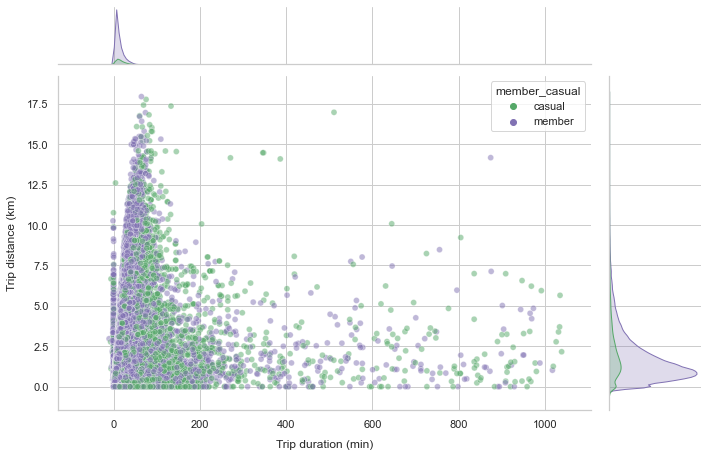

In [111]:
dur_dist_user_plot = sns.jointplot(data=data[filtered_entries], 
                                   x="duration_min", 
                                   y="distance_km", 
                                   hue="member_casual", 
                                   palette={"casual": "g", "member": "m"}, 
                                   alpha=0.5)
dur_dist_user_plot.set_axis_labels("Trip duration (min)", "Trip distance (km)", labelpad=10)
dur_dist_user_plot.fig.set_size_inches(10.5, 6.5)

### Get correlation between quantitative variables

In [120]:
data_to_corr = data[["duration_min","distance_km"]]
data_to_corr

,duration_min,distance_km
0,5.716667,0.668508
1,17.600000,2.943338
2,32.200000,0.487733
3,18.816667,2.943338
4,4.966667,0.900273
...,...,...
649978,12.600000,0.000000
649979,3.250000,0.000110
649980,14.333333,0.000000
649981,13.250000,3.083159


In [117]:
z_scores = zscore(data_to_corr[["duration_min", "distance_km"]]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
filtered_rows = (abs_z_scores < 3).all(axis=1) 

# Array of boolean values where value is True if it is an outlier, otherwise False.
data_to_corr_outliers = (abs_z_scores >= 3)
data_to_corr[data_to_corr_outliers] # Show outlier values

,duration_min,distance_km
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
649978,NaN,NaN
649979,NaN,NaN
649980,NaN,NaN
649981,NaN,NaN


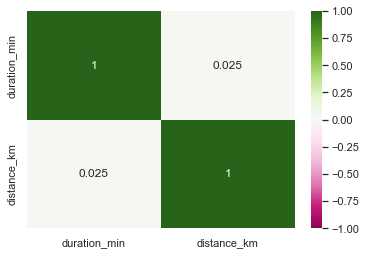

In [122]:
data_corr_heatmap = sns.heatmap(data_to_corr.corr(), 
                                center=0, 
                                cmap="PiYG", 
                                annot=True, 
                                vmin=-1, 
                                vmax=1)

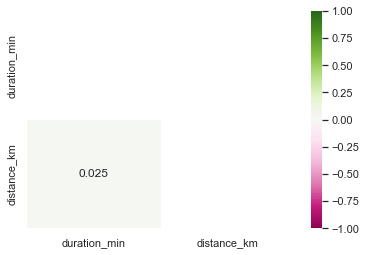

In [124]:
mask = np.triu(np.ones_like(data_to_corr.corr(), dtype=bool))

data_corr_heatmap = sns.heatmap(data_to_corr.corr(), 
                                center=0, 
                                cmap="PiYG", 
                                annot=True, 
                                mask=mask,
                                vmin=-1, 
                                vmax=1)

Variables `distance_km` and `duration_min` showed some positive correlation. We can still include them as features in a modeling task later.

In [148]:
start_stations = data[['start_lat', 'start_lng']].drop_duplicates()
start_stations

,start_lat,start_lng
0,40.778626,-73.957720
1,40.680983,-73.950047
4,40.742685,-73.986713
7,40.750072,-73.998392
8,40.801694,-73.957145
...,...,...
538294,40.652512,-74.008906
539707,40.768442,-73.893531
553083,40.834857,-73.903743
563899,40.772899,-73.896849


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='start_lat', ylabel='start_lng'>

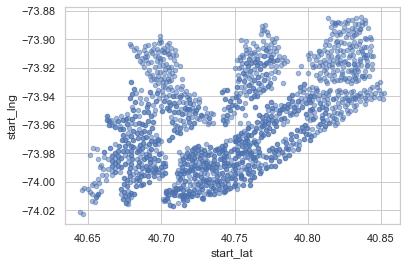

In [154]:
start_stations.plot.scatter(x='start_lat', y='start_lng', alpha=0.5)